In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [3]:
df1 = pd.read_csv('Outlet-x.csv') # Reading Data
df2 = pd.read_csv('Outlet-y.csv')
df3 = pd.read_csv('Outlet-z.csv')

df1 = df1.head(25891)
df2 = df2.head(50720)
df3 = df3.head(31820)

# Converting to datetime datatype
df1['TransactionDateTime1'] = pd.to_datetime(df1['TransactionDateTime1'], infer_datetime_format=True)
df2['TransactionDateTime1'] = pd.to_datetime(df2['TransactionDateTime1'], infer_datetime_format=True)
df3['TransactionDateTime1'] = pd.to_datetime(df3['TransactionDateTime1'], infer_datetime_format=True)

# Grouping on Outlet Number, Pump Number, Transaction Hour and aggregating the Quantity
d1 = df1.groupby([df1['OutletNumber'], df1['PumpNumber1'], df1['TransactionDateTime1'].dt.hour]).agg({'Quantity1':'sum'})
d2 = df2.groupby([df2['OutletNumber'], df2['PumpNumber1'], df2['TransactionDateTime1'].dt.hour]).agg({'Quantity1':'sum'})
d3 = df3.groupby([df3['OutletNumber'], df3['PumpNumber1'], df3['TransactionDateTime1'].dt.hour]).agg({'Quantity1':'sum'})

frames = [d1, d2, d3]
d = pd.concat(frames) # Combining all the outlets

# Converting the transactions hour into columns via pivot table
p = d.pivot_table('Quantity1', ['OutletNumber', 'PumpNumber1'], 'TransactionDateTime1')
p.replace(np.nan, 0.00, inplace = True) # Replacing the null values with 0.00
p.head()

TransactionDateTime1       0    1    2    3    4    5       6        7   \
OutletNumber PumpNumber1                                                  
Outlet-x     2            0.0  0.0  0.0  0.0  0.0  0.0   22.90   523.28   
             4            0.0  0.0  0.0  0.0  0.0  0.0   13.92   205.07   
             6            0.0  0.0  0.0  0.0  0.0  0.0    0.00    26.56   
             7            0.0  0.0  0.0  0.0  0.0  0.0  127.15  1316.44   
             10           0.0  0.0  0.0  0.0  0.0  0.0    0.00    58.45   

TransactionDateTime1           8        9   ...       14       15       16  \
OutletNumber PumpNumber1                    ...                              
Outlet-x     2             800.54  1382.39  ...  1182.52  1175.76  1093.13   
             4            1172.37  1556.72  ...  1527.17  1020.11  1685.76   
             6             686.30  1233.53  ...   719.92   684.12  1071.79   
             7            1790.77  2367.25  ...  1719.26  1683.91  1728.10   
             10            712.54  1473.54  ...  1820.39  1862.55  1975.49   

TransactionDateTime1           17       18       19       20       21      22  \
OutletNumber PumpNumber1                                                        
Outlet-x     2            1341.73  1754.91  1669.22  1125.57   754.74  514.04   
             4            1983.74  2344.76  2070.07  1187.84   739.74  627.00   
             6             957.38   681.88  1105.67   512.33   386.16  260.35   
             7            2044.91  2253.85  2278.05  1883.93  1244.46  709.21   
             10           2615.89  1889.80  2113.03   825.61   437.77  426.42   

TransactionDateTime1          23  
OutletNumber PumpNumber1          
Outlet-x     2            155.61  
             4            306.79  
             6            142.57  
             7            431.82  
             10           250.27  

[5 rows x 24 columns]

In [4]:
da = p.max(axis = 1).reset_index() # Retreiving the maximum volume of each pump 
da.columns = ['OutletNumber', 'PumpNumber1', 'Quantity1']

db = p.idxmax(axis = 1).reset_index() # Retreiving the hour at which the pump has maximum volume
db.columns =  ['OutletNumber', 'PumpNumber1', 'TransactionDateTime1']

c = pd.merge(da, db) # Merging the table of maximum volume of each pump and at what hour of all outlets 

In [5]:
x = c.iloc[:, [2, 3]].values
kmean = KMeans(n_clusters = 2)
y_kmeans = kmean.fit_predict(x) # Categorised the clusters 
print(y_kmeans)
c['Category'] = y_kmeans

[0 0 0 0 1 0 0 0 0 0 1 0 1 0 0]


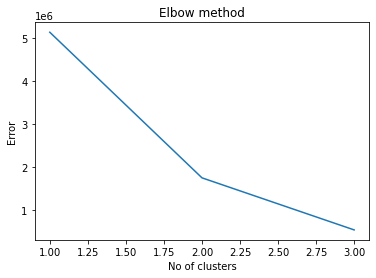

In [6]:
Error =[]
for i in range(1, 4):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
plt.plot(range(1, 4), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

Text(0, 0.5, 'Quantity')

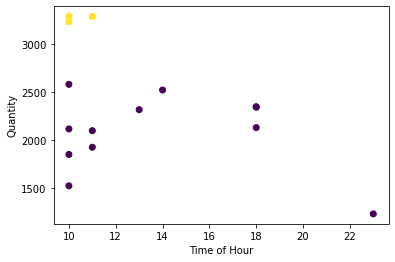

In [7]:
plt.scatter(x = c['TransactionDateTime1'], y = c['Quantity1'], c = y_kmeans) # clustered data plot
plt.xlabel('Time of Hour')
plt.ylabel('Quantity')

In [8]:
c.sort_values(['Quantity1'], ascending = False, inplace = True)
med = c['Quantity1'].median()
c

,OutletNumber,PumpNumber1,Quantity1,TransactionDateTime1,Category
10,Outlet-z,2,3287.08,10,1
4,Outlet-x,10,3284.58,11,1
12,Outlet-z,6,3229.95,10,1
3,Outlet-x,7,2578.00,10,0
7,Outlet-y,6,2518.97,14,0
1,Outlet-x,4,2344.76,18,0
8,Outlet-y,7,2340.74,18,0
6,Outlet-y,4,2314.10,13,0
9,Outlet-y,8,2127.76,18,0
13,Outlet-z,7,2113.75,10,0


In [9]:
c1 = c[c['Quantity1'] > med] 
c2 = c1.groupby([c['OutletNumber']])['OutletNumber'].count()
c2.idxmax(axis = 1)

'Outlet-x'

In [10]:
c2

OutletNumber
Outlet-x    3
Outlet-y    2
Outlet-z    2
Name: OutletNumber, dtype: int64